# Homework 2

This is a homework assignment on the material from the 6th-9th classes. The deadline for submission is __23:59 on October 29__.

- The homework is done in the same Jupyter Notebook.

- The file should be renamed: __Group Number_First Name_Last Name__ (no spaces at the beginning or end). Example: __000_Ivan_Ivanov__.

- Homework should be sent to __OptimizationHomework@yandex.ru__. Subject line: __Innopolis_Task number__ (without spaces at the beginning and end). For this assignment, the subject line is: __Innopolis_2__.

- Place the solution to each problem/item after the condition.

- Do not forget to add necessary explanations and comments.

- All technical artifacts should be removed in the final version that will be sent for checking. By such artifacts we mean any cell outputs that are not commented in any way in the text, as well as any bulk/long technical output (even if it is commented in the text).

- A full run of the solution (Kernel -> Restart & Run All) should run all cells without errors.

- The maximum score for the assignment is 100.

We wish you success!

# Part 1. Solving the unconstrained optimization problem

Consider the problem of empirical risk minimization:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2,
\end{equation}
where $\ell$ is the loss function, $g$ is the model, $w$ is the model parameters, $\{x_i, y_i\}_{i=1}^n$ is the data sample from feature vectors $x_i$ and labels $y_i$, $\lambda > 0$ is the regularization parameter.

We use the linear model $g(w, x) = w^T x$ and the logistic/sigmoidal loss function: $\ell(z,y) = \ln (1 + \exp(-yz))$ (__Important: $y$ must take values $-1$ or $1$__). The resulting problem is called a logistic regression problem. 

## __Problem 1. (20 points)__ Let us do some preparation work. 


### __а). (15 points)__ Write out the gradient and the Hessian for this problem. 

Prove that the problem is $\mu$-strongly convex and has $L$-Lipschitz gradient with $\mu = \lambda$ and $L = \lambda + \frac{1}{4n} \sum_{i=1}^n \| x_i\|^2_2$. 

Let $L_s$ be the problem's function. Let's define $L_s = L_1 + L_2$, where
\begin{align}
L_1 &= \frac{1}{n}\sum_{i=1}^{n} l(<w, x_i>, y_i) \\
L_2 &= \frac{\lambda}{2} \| w \|_2 ^ 2
\end{align}
$L_1$ is a sum, so let's define the derivative of each term.

Let's denote $y_i$ by $y$, $x_i$ by $x$,and $z = <y.x, w>$

Then, we have:
\begin{align}
dz = <yx, dw>
\end{align}
Defining $h = \ln(1 + \exp(-t))$, then $h^{'} = \frac{-1}{1 + e^t}$ and:

\begin{align}
f &= h(z)  && \text{$f$ is a single term in the sum}\\
df &= h'(z) \cdot dz \\
df &=  \frac{-1}{1 + e^z} \cdot <y.x, dw> \\
df &=  \frac{- <y.x, dw>}{1 + e^{<y.x, w>}}  \\
\implies \nabla f &= -\frac{y \cdot x}{1 + e^{<y \cdot x, w>}} \\
\implies \nabla L_1 &= \sum_{i = 1}^n -\frac{y_i \cdot x_i}{1 + e^{<y_i \cdot x_i, w>}}
\end{align}

As for $L_2$, we have:
\begin{align}
d(L_2) &= \lambda \cdot <w, dw> \\
\implies \nabla L_s &= \frac{1}{n}\sum_{i = 1}^n -\frac{y_i \cdot x_i}{1 + e^{<y_i \cdot x_i, w>}} + \lambda \cdot w
\end{align}


* 2nd order derivative: Hessian matrix:

I will use the same approach as in the first part.
\begin{align}
d^2(f) &= <d (\nabla f), dw_1> \\
d (\nabla f) &= - \frac{(1 + e^z) \cdot d(y \cdot x) - d(1 + e^z) \cdot y \cdot x}{(1 + e^z)^2} \\
d(\nabla f) &= \frac{e ^ z \cdot <y \cdot x, dw> \cdot y \cdot x }{(1 + e^z)^2}&& \text{differentiation with respect to $w \implies d(y \cdot x) = 0$} \\
\implies d(\nabla f) &= \frac{e ^ z \cdot x\cdot <x, dw>}{(1 + e^z)^2} && \text{using $y \in \{1, -1\}$} \\
\implies d(\nabla f) &= \frac{e ^ z \cdot x\cdot x^T \cdot dw}{(1 + e^z)^2} \\
\implies d^2(f) &= <\frac{e ^ z \cdot x\cdot x^T \cdot dw}{(1 + e^z)^2}, dw_1> \\
\implies d^2(f) &= <\frac{e ^ z \cdot x\cdot x^T}{(1 + e^z)^2} \cdot dw_1, dw> && \text{using $<Ab, c> = <A^Tc, b>$} \\
\implies \nabla ^ 2 f &= \frac{e ^ {<y \cdot x, w>} \cdot x\cdot x^T}{(1 + e^{<y \cdot x, w>})^2} \\
\implies \nabla ^ 2 L_1 &= \frac{1}{n} \sum_{i=1}^n \frac{e ^ {<y_i \cdot x_i, w>} \cdot x_i\cdot x_i^T}{(1 + e^{<y_i \cdot x_i, w>})^2}
\end{align}

As for $\nabla ^ 2 L_2 = λ$. Therefore,
$$ \nabla ^ 2 L_s = \frac{1}{n} \sum_{i=1}^n \frac{e ^ {<y_i \cdot x_i, w>} \cdot x_i\cdot x_i^T}{(1 + e^{<y_i \cdot x_i, w>})^2} + λ \cdot I_d  
$$


For any vector $x$, the matrix $x \cdot x^T$ is positive definite, since:

\begin{align}
 a^T \cdot (x \cdot x^T) \cdot a &= b^T \cdot b \geq 0&& \text{where $b = x ^ T \cdot a$}
\end{align}
and since, the term $\frac{e ^ {<y_i \cdot x_i, w>}}{(1 + e^{<y_i \cdot x_i, w>})^2}$ is always positive, we can say taht $L_1$ is indeed convex.

$I_d$ is positive definite. and Thus, $L_s$ is convex.

$L_s$ is also strong convex with $\mu = λ$ since $∇^2 L_s - λ \cdot I_d$ is semi positive definite.

* Estimate: $L$

Let's define $a_i = y_i \cdot x_i$, then we have:

$$
\nabla L_s = \frac{1}{n}\sum_{i = 1}^n -\frac{a_i}{1 + e^{<a_i, w>}} + \lambda \cdot w
$$
The constant $L$ satisfies the following inequality:

\begin{align}
\| \nabla L_s(w_1) - \nabla L_s (w_2) \| &\leq L \cdot \|w_1 - w_2 \| ~~ \forall w_1, w_2 \in \mathbb{R}^{d} \\
\| \frac{1}{n} \cdot  \sum_{i=1}^n -\frac{a_i}{1 + e^{<a_i, w1>}} + \lambda w_1 + \frac{1}{n} \cdot  \sum_{i=1}^n \frac{a_i}{1 + e^{<a_i, w_2>}} -  \lambda \cdot  w_2 \| &\leq L \cdot \|w_1 - w_2 \|
\end{align}
The inequality above is slightly challenging to solve. We proceed as follows:

\begin{align}
 \|\sum_{i = 1}^n x_i \| & \leq \sum_{i = 1}^n \|x_i\| \\
 \implies \| \frac{1}{n} \cdot \sum_{i=1}^n -\frac{a_i}{1 + e^{<a_i, w1>}} + \lambda w_1 + \frac{1}{n} \cdot \sum_{i=1}^n \frac{a_i}{1 + e^{<a_i, w_2>}} -  \lambda \cdot  w_2 \| & \leq \frac{1}{n} \cdot \sum_{i = 1}^n \| a_i \| \cdot | \frac{1}{1 + e^{<a_i, w_1>}} - \frac{1}{1 + e ^ {<a_i, w_2>}}| + \lambda \cdot \|w_1 - w_2 \|
\end{align}

To estimate $| \frac{1}{1 + e^{<a_i, w_1>}} - \frac{1}{1 + e ^{<a_i, w_2>}}|$, we need the following result (cited from [this paper](https://www.emis.de/journals/AM/08-3/am1630.pdf)):

\begin{align}
\frac{|e^x - e^y|}{e^x + e^y} &\leq \frac{|x - y|}{2} ~~ \forall x, y \in \mathbb{R} \\
|\frac{1}{1 + e^x} - \frac{1}{1 + e^y} | &= |\frac{e^y - e^x}{(1 + e^x) \cdot (1 + e^y)}| \\
(1 + e^x) \cdot (1 + e^y) &\geq (e^x + e^y) \\
\implies \frac{|e^x - e^y|}{(1 + e^x) \cdot (1 + e^y)} &\leq \frac{|e^x - e^y|}{e^x + e^y} \\
\implies \frac{|e^x - e^y|}{(1 + e^x) \cdot (1 + e^y)} &\leq \frac{|x - y|}{2}
\end{align}

substituting, $x = <a_i, w_1>$ and $y = <a_i, w_2>$:
\begin{align}
| \frac{1}{1 + e^{<a_i, w_1>}} - \frac{1}{1 + e ^{<a_i, w_2>}}| &\leq \frac{| <a_i, w_1> - <a_i, w_2> |}{2} = \frac{|<a_i, w_1 - w_2>|}{2} \\
|<a_i, w_1 - w_2>| &\leq \|a_i\| \cdot \|w_1 - w_2 \| && \text{by Cauchy inequality} \\
\implies | \frac{1}{1 + e^{<a_i, w_1>}} - \frac{1}{1 + e ^{<a_i, w_2>}}| &\leq \frac{1}{2} \cdot \|a_i\| \cdot \|w_1 - w_2 \|
\end{align}

Using this result:

\begin{align}
\| \sum_{i=1}^n -\frac{a_i}{1 + e^{<a_i, w1>}} + \lambda w_1 + \sum_{i=1}^n \frac{a_i}{1 + e^{<a_i, w_2>}} -  \lambda \cdot  w_2 \| &\leq \frac{1}{2n} \cdot
\sum_{i = 1}^{n}\|a_i\| ^ 2 \cdot \|w_1 - w_2\| + \lambda \|w_1 - w_2\|
= (\frac{1}{n} \sum_{i = 1}^{n}\|a_i\| ^ 2 + \lambda) \cdot \|w_1 - w_2 \|
\end{align}
Thus, for 
$$L = \frac{1}{2n} \sum_{i = 1}^{n}\|x_i\| ^ 2 + \lambda \\
\| \nabla L_s(w_1) - \nabla L_s (w_2) \| \leq L \cdot \|w_1 - w_2 \|~~ \forall w_1, w_2 \in \mathbb{R}^{d}
$$

The _mushrooms_ dataset is attached. Use the following code to generate a matrix $X$ and vector $y$, which will store the sample $\{x_i, y_i\}_{i=1}^n$:

In [29]:
dataset = "mushrooms.txt" 
#the file must be in the same directory as notebook.

In [30]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

Let us change the vector $y$ so that $y_i$ takes values $-1$ and $1$. You can also do additional preprocessing of the data (with techniques from machine learning), but this is not additionally assessed in any way.

In [31]:
y = 2 * y - 3

Let us divide the data into two parts: training and test.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# let's apply some preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit it to the data
X_trian = scaler.fit_transform(X_train)

# transform the test split
X_test = scaler.transform(X_test)

### __b). (5 points)__ 
For the training part $X_{train}$, $y_{train}$, estimate the constant $L$. 

Set $\lambda$ such that $\lambda \approx L / 1000$.  

Realize in the code the calculation of the value, gradient and Hessian for our target function ($X$, $y$, $\lambda$ should be given as a parameter so that it is possible to change them, not only to substitute fixed $X_{train}$, $y_{train}$).

In [34]:
import numpy as np
from typing import Tuple, List, Union

def p1_verify_input(X: np.ndarray, y: np.ndarray, w: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    # first let's make sure the input is as expected: X is expected to have samples as rows
    if X.ndim != 2:
        raise ValueError(f"the training is expected to have at least 2 samples")
    
    num_samples, dim = X.shape 
    # make sure 'y' matches the number of samples
    y = np.expand_dims(y, axis=1) if y.ndim == 1 else y

    if y.shape != (num_samples, 1):
        raise ValueError((f"The number of labels is expected to match the number of samples"
                          f"\nFound: {y.shape} Expected: {(num_samples, 1)}"))
    # check 'w' as well:
    w = np.expand_dims(w, axis=0) if w.ndim == 1 else w
    # make sure the dimensions match
    if w.shape != (dim, 1):
        raise ValueError((f"The weight matrix 'w' is expected as a column vector with length {dim}\n"
                          f"Expected: {(dim, 1)}. Found: {w.shape}"))
    return X, y, w

In [35]:
def p1_value_function(X: np.ndarray, 
                   y: np.ndarray,
                   w: np.ndarray, 
                   lam: float) -> float:
    """ This function calculates different values of the function gives it parameters:

    Args:
        X (np.ndarray): The training data
        y (np.ndarray): The labels
        w (np.ndarray): the weights
        lam (float): lambda: the regularization hyper-parameter

    Returns:
        float: The value for the function with parameter 'w'
    """
    # first step is to verify the input
    X, y, w = p1_verify_input(X, y, w)
    
    num_samples, _ = X.shape
    # now as our input has been verified we proceed by defining some useful intermediate variables
    A = X * y
    preds = A @ w

    # preds should be of shape: num_samples, 1
    preds = np.expand_dims(preds, axis=-1) if preds.ndim == 1 else preds
    # let's calculate the exponential function: 
    exp = np.exp(-preds) # exp now contains the at each row: exp(w_i^T * y_i* x_i)
    assert exp.shape == (num_samples, 1), " Make sure the shape of the exponential matrix is correct"

    # calculate L1
    # exp contains the exponential of -w^T x_i in each row    
    # then add 1 and apply log on each of them
    # then the mean    

    l1 = np.mean(np.log(1 + exp))
    
    # calculate L2 : lambda / 2 * the norm of 'w' squared
    l2 = (lam / 2) * np.linalg.norm(w) ** 2

    # sum the main loss and the regularization
    l = l1 + l2

    return l

In [36]:
def p1_gradient_function(X: np.ndarray, 
                      y: np.ndarray, 
                      w: np.ndarray, 
                      lam: float) -> np.ndarray:
    # verify the input
    X, y, w = p1_verify_input(X, y, w)

    A = X * y
    preds = A @ w 

    # preds contains the w^T x_i in each row
    # apply the exponential on each
    # A / (1 + np.exp(preds)) contains y_i * x_i / (1 + e^{w_i^T y_i x_i}) in each row: which a row vector

    # then calculate the mean over axis=0 to get a row vector
    
    dl1 = np.mean(A / (1 + np.exp(preds)), axis=0)

    assert dl1.shape == (X.shape[1], )

    dl = - np.expand_dims(dl1, axis=-1) + lam * w

    assert dl.shape == (X.shape[1], 1), "The gradient is expected to be a column vector."
    
    return dl

In [37]:
def p1_hessian_function(X: np.ndarray, 
                   y: np.ndarray, 
                   w: np.ndarray, 
                   lam: float) -> np.ndarray:
    # verify the input
    X, y, w = p1_verify_input(X, y, w)
    num_samples, dim = X.shape

    A = X * y
    preds = A @ w 

    # convert to np.128 to avoid numerical overflow
    preds = preds.astype(np.float64)

    # create the hessian matrix with zero values
    hessian_matrix = np.zeros((dim, dim), dtype=np.float64)

    exp_coeffs = 1 / (1 + np.exp(preds)) - 1 / ((1 + np.exp(preds)) ** 2)

    # # write the expression of the coefficients at once to avoid numerical overflow
    # exp_coeffs = np.exp(preds) / ((1 + np.exp(preds)) ** 2)

    # # exp1 will contain the exp (w^T y_i x_i) in each row
    # exp1 = np.exp(preds)
    # # exp2 will contains (1 + exp (w^T y_i x_i)) ^ 2
    # exp2 = (1 + exp1) ** 2

    assert exp_coeffs.shape == (num_samples, 1)

    # assert exp1.shape == (num_samples, 1) and exp2.shape == (num_samples, 1)

    #iterate through each sample
    for i in range(num_samples):
        # first step calculate the x_i * x_i ^ T
        # extract x_i: row vector in code
        x_i = X[i, :]
        
        assert x_i.shape == (dim,), "The row sample is expected to be 1 dimensional"
        # expand 
        x_i = np.expand_dims(x_i, axis=-1)

        matrix_xi = x_i @ x_i.T
        # add an assert to catch any errors with shapes
        assert matrix_xi.shape == (dim, dim), "Make sure the matrix x_i * x_i ^ T is computed correctly"

        hessian_xi = exp_coeffs[i][0] * matrix_xi
        # time to add the coefficient associated with the matrix_xi
        # hessian_xi = (exp1[i][0] / exp2[i][0]) * matrix_xi
        hessian_matrix += hessian_xi

    # make sure the shape of the hessian matrix 
    hessian_matrix.shape == (dim , dim), "Make sure the hessian matrix is of the correct shape"
    return hessian_matrix

In [38]:
X = np.random.rand(4, 5)

n1 = np.linalg.norm(X) ** 2

n2 = 0
for xi in X: 
    n2 += np.linalg.norm(xi) ** 2

np.isclose(n1, n2)

True

In [39]:
def p1_L_estimation(X: np.ndarray,
                 y: np.ndarray,
                 w: np.ndarray, 
                 lam: float) -> float:
    
    # return the estimation by the problem description
    X, y, w = p1_verify_input(X, y, w) 
    
    num_samples, _ = X.shape

    L = np.linalg.norm(X) ** 2 / (4 * num_samples) + lam

    L = min(L, 1000 * lam)

    return L

## __Problem 2. (20 points)__ This part of the assignment is related to momentum and acceleration.

### __a). (5 points)__ Implement the heavy ball method and Nesterov's accelerated gradient method. 

Just in case, we give here a variant of the function description for the gradient descent from the first assignment. 

You can use this format if you wish. Note that ``x_sol`` occurs in the code - this problem should be solved or criteria tied to ``x_sol`` should not be used.

In [40]:

from numpy.linalg import norm

def x_difference(x1: np.ndarray, x2: np.ndarray) -> float:
    """Computes the euclidean norm of the difference vector 

    Args:
        x1 (np.ndarray): first vector
        x2 (np.ndarray): second vector

    Returns:
        float: returns the norm of the difference
    """
    return norm(x1 - x2, ord=2)

def f_difference(f1: float, f2: float) -> float:
    """returns the absolute difference between 2 values """
    # the expression f_x_k - f_sol is equivalent since the problem is minimization,
    # but the 'abs' function was used to make the method general and not only specific to the given problem
    return abs(f1 - f2)  

In [41]:
# let's define the modes in terms of strings
x_diff = 'x_k+1 - x_k'
f_diff = 'f(x_k+1) - f(x_k)'
normalized_criterion = 'df_xk / df_x0'


def heavy_ball_method(function: callable, 
                      grad_function: callable, 
                      x_0: np.ndarray, 
                      gamma_k: callable,
                      momentum_k: callable,  
                      K = 10**3, 
                      eps = 10**-5, 
                      mode = normalized_criterion, 
                      return_history: bool = True
                      ):
    
    # the first step is to make sure the 'mode' variable is defined above
    if mode not in [f_diff, x_diff, normalized_criterion]:
        raise ValueError((f"the variable 'mode' is expected to belong to {[f_diff, x_diff]}"
                          f"Found: {mode}"))
    
    # a boolean flag to determine whether to stop the iterative process
    criterion_stop = False

    # counter for the number of iterations
    k = 0

    # x_p0: stands for the x{k - 1}, x_p1: x{k - 2}
    x_new, x_current, x_previous = x_0, x_0, x_0

    # create a list to save the intermediate points  
    x_history = [x_current]
    criterion_history = [1]

    while not criterion_stop:
        x_previous = x_current
        x_current = x_new
        
        # compute the step size
        gamma = gamma_k(k)
        mom = momentum_k(k)
        
        x_new = x_current - gamma * grad_function(x_current) + mom * (x_current - x_previous) 
        
        if mode == f_diff:
            diff = f_difference(function(x_new), function(x_current))
        elif mode == x_diff:
            diff = x_difference(x_new, x_current)
        else:
            diff = norm(x_current) / norm(x_0)

        # add 'x_current' to the history
        x_history.append(x_current)
        # add the current criterion to history 
        criterion_history.append(diff)
        # increment 'k' 
        k += 1

        # stop the iterative process either because the maximum number of iterations is reached 
        # or the difference is less than epsilon
        criterion_stop = diff <= eps or k >= K
    
    assert len(x_history) == k + 1

    # the function will all intermediate points if the 'return_history' argument is set to True
    # and only the last point otherwise    
    return x_history, criterion_history if return_history else x_history[-1]


In [42]:
def naesterov_method(function: callable, 
                      grad_function: callable, 
                      x_0: np.ndarray, 
                      gamma_k: callable,
                      momentum_k: callable,  
                      K = 10**3, 
                      eps = 10**-5, 
                      mode = normalized_criterion, 
                      return_history: bool = True):
    # the first step is to make sure the 'mode' variable is defined above
    if mode not in [f_diff, x_diff, normalized_criterion]:
        raise ValueError((f"the variable 'mode' is expected to belong to {[f_diff, x_diff, normalized_criterion]}"
                          f"Found: {mode}"))
    
    # a boolean flag to determine whether to stop the iterative process
    criterion_stop = False

    # counter for the number of iterations
    k = 0

    # set the variables for the parameters 'x', 'y'
    x_current, x_previous, y_current = x_0, x_0, x_0

    # create a list to save the intermediate points  
    x_history = [x_current]
    criterion_history = [1]

    while not criterion_stop:
        x_previous = x_current
        
        # compute the step size
        gamma = gamma_k(k)
        mom = momentum_k(k)
        # compute the (k + 1)-th 'x' point
        # compute the (k + 1)-th 'y' point

        x_current = y_current - gamma * grad_function(y_current)
        y_current = x_current - mom * (x_current - x_previous)
        
        if mode == f_diff:
            diff = f_difference(function(x_current), function(x_current))

        elif mode == x_difference:
            diff = x_difference(x_current, x_previous)        
        else:
            diff = norm(x_current) / norm(x_0)

        criterion_history.append(diff)
        # add 'x_current' to the history
        x_history.append(x_current)
        # increment 'k' 
        k += 1

        # stop the iterative process either because the maximum number of iterations is reached 
        # or the difference is less than epsilon
        criterion_stop = diff <= eps or k >= K
    
    assert len(x_history) == k + 1

    # the function will all intermediate points if the 'return_history' argument is set to True
    # and only the last point otherwise    
    return x_history, criterion_history if return_history else x_history[-1]


In [59]:
def gradient_descent(function: callable, 
                     grad_function: callable, 
                     x_0: np.ndarray,                      
                     K: int = 10 ** 3,
                     eps: float = 10 ** -5, 
                     mode: str = normalized_criterion,
                     gamma_k: callable = None,                      
                     return_history: bool = False
                     ) -> Union[List[np.ndarray], np.ndarray]:
    """This function applies the gradient descent algorithm for any given function

    Args:
        function (callable): a callable object that computes the value of the function at any given point
        grad_function (callable): a callable object that computes the value of the function's gradient at any given point
        x_0 (np.ndarray): the starting point
        x_sol (np.ndarray): The analytical solution of the problem
        K (int, optional): the maximum number of iterations. Defaults to 10**3.
        eps (float, optional): As soon as the criterion goes below this value, the algorithm stops. Defaults to 10**-5.
        mode (str, optional): Which criterion to consider. Defaults to x_opt_diff.
        gamma_k (callable, optional): A callable object that determines the step size at the k-th iteration. Defaults to None.
        greedy_step_func (callable, optional): _description_. Defaults to None.
        polyak_step_func (callable, optional): _description_. Defaults to None.
        return_history (bool, optional): _description_. Defaults to False.

    Raises:
        ValueError: _description_

    Returns:
        Union[List[np.ndarray], np.ndarray]: _description_
    """

    # the first step is to make sure the 'mode' variable is defined above
    if mode not in [f_diff, x_diff, normalized_criterion]:
        raise ValueError((f"the variable 'mode' is expected to belong to {[f_diff, x_diff, normalized_criterion]}"
                          f"Found: {mode}"))


    # a boolean flag to determine whether to stop the iterative process
    criterion_stop = False

    # counter for the number of iterations
    k = 0
    x_current, x_previous = x_0, x_0

    # create a list to save the intermediate points  
    x_history = [x_current]

    while not criterion_stop:
        # save the k-th point
        x_previous = x_current

        gamma = gamma_k(k)

        # compute the (k+1)-th point
        x_current = x_current - gamma * grad_function(x_current)  

        # compute the criterion
        if mode == x_diff:
            diff = x_difference(x_previous, x_current)
        elif mode == f_diff:
            diff = f_difference(function(x_previous), function(x_current))
        else:
            diff = norm(x_current) / norm(x_0)

        # add 'x_current' to the history
        x_history.append(x_current)

        # increment 'k' 
        k += 1

        # stop the iterative process either because the maximum number of iterations is reached 
        # or the difference is less than epsilon
        criterion_stop = diff <= eps or k >= K
    
    assert len(x_history) == k + 1

    # the function will all intermediate points if the 'return_history' argument is set to True
    # and only the last point otherwise    
    return x_history if return_history else x_history[-1]


### __b). (15 points)__ Solve an optimization problem on a train sample using two implemented methods. 

1, Fix a step $\frac{1}{L}$ and search different values of momentum from $-1$ to $1$. 

2. Check also the momentum values equal to $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ is the iteration number), and also $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. 

3. You can choose your own starting point and convergence criterion; 

4. we recommend using the normalized version of the criterion, for example, $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$, as well as using the same starting point and convergence criterion in Problems 3-4.

In this task, you should draw three plots: 

1) the convergence criterion values from iteration number for the heavy ball method with different values of momentum, 

2) the convergence criterion values from iteration number for the accelerated gradient method with different values of momentum, and 

3) the convergence criterion values from iteration number for the two methods with the best choice of momentum for each, as well as the gradient descent.

Remember to make conclusions and comment on the results. 

For example, reflect on whether convergence is always monotone.

In [60]:
# let's start with setting up the different paramters needs 

# the regualization parameter
REG = 10 ** -3
# a callable object with the main loss
p1_function = lambda x: p1_value_function(X=X_train, y=y_train, w = x, lam = REG)
# callable object for the gradient function
p1_grad = lambda x: p1_gradient_function(X=X_train, y=y_train, w = x, lam = REG)

p1_H = lambda x: p1_hessian_function(X=X_train, y=y_train, w=x, lam=REG)
# the estimation of 'L'
L = p1_L_estimation(X=X_train, y=y_train, w=np.random.rand(X_train.shape[1], 1), lam=REG)

# a callable object to return 1 / L as a constant step size
gamma_k = lambda _ : 1 / L

# create different callable objects for momentum
m1 = lambda k: k / (k + 1)
m2 = lambda k: k / (k + 2)
m3 = lambda k: k / (k + 3)

mLU = lambda _: (np.sqrt(L) - np.sqrt(REG)) / (np.sqrt(L) + np.sqrt(REG))

momentum_functions = [m1, m2, m3, mLU]

ms = np.linspace(start=-1, stop=1, num=8)
print(ms)
momentum_functions.extend([lambda _ : m for m in ms])

# create the labels for each momentum step
momentum_labels = ["k / (k + 1)", "k / (k + 2)", "k / (k + 3)", "(sqrt(L) - sqrt(mu)) / (sqrt(L) + sqrt(mu))"]
# add the labels for the constant momentum steps
momentum_labels.extend([str(round(k, 4)) for k in ms])

[-1.         -0.71428571 -0.42857143 -0.14285714  0.14285714  0.42857143
  0.71428571  1.        ]


In [61]:
import matplotlib.pyplot as plt
import random

# create the set up: x_0 and seed
def set_up(seed: int = 69) -> np.ndarray:
        # changing the seed mainly changes the starting point
    random.seed(seed)
    np.random.seed(seed)

    w_0 = np.random.randn(X_train.shape[1], 1)
    return w_0

def simulation( optimization_algorithm: callable,
                function: callable, 
                grad_function: callable, 
                gamma_k: callable=None,
                momentum_k: callable=None,  
                K = 10**3, 
                eps = 10**-5, 
                mode = normalized_criterion, 
                seed: int = 69
               ):
    
    
    x_0 = set_up(seed=seed)
    
    # get the points from the gradient descent
    if momentum_k is not None:
        x_points, criterions = optimization_algorithm(function=function, 
                                    grad_function=grad_function,  
                                    x_0=x_0,
                                    gamma_k=gamma_k,
                                    momentum_k=momentum_k,
                                    K = K,
                                    eps=eps,
                                    mode=mode, 
                                    return_history=True, 
                                    )
        return x_points, criterions

    x_points, criterions = optimization_algorithm(
                                function=function, 
                                grad_function=grad_function,  
                                x_0=x_0,
                                gamma_k=gamma_k,
                                K = K,
                                eps=eps,
                                mode=mode, 
                                return_history=True, 
                                )

    return x_points, criterions   

In [62]:
plt.figure(figsize=(10, 10))

def plot_iterations(criterions: List[float],
                    start_index: int = 0, 
                    end_index: int = -1,
                    plot_label: str = None,
                    x_label: str = None,
                    y_label: str = None,
                    show:bool = True,
                    ):
    
    end_index = (end_index + len(criterions)) % len(criterions)

    if plot_label is None:
        plt.plot(list(range(start_index, end_index)), criterions[start_index:end_index])
    else:
        plt.plot(list(range(start_index, end_index)), criterions[start_index:end_index], label=str(plot_label))
    

    plt.xlabel('iteration' if x_label is None else x_label)
    plt.ylabel('criterion (log_{10} scale)' if x_label is None else y_label)
    
    if show:
        plt.legend()
        plt.show()


<Figure size 1000x1000 with 0 Axes>

In [63]:
# plt.figure(figsize=(10, 20))
# # let's start with plotting the results for the heavy_ball method
# # make sure to save the best performing result

# best_hb_mom = None
# min_value_function = float('inf')

# for mom_k, mom_k_label in zip(momentum_functions, momentum_labels):
#     # run the simulation 
#     x_points, criterions = simulation(optimization_algorithm=heavy_ball_method, 
#                                       function=function,
#                                       grad_function=grad,
#                                       gamma_k=gamma_k, 
#                                       momentum_k=mom_k)
    
#     criterions = [np.log10(c) for c in criterions]

#     value_last_point = function(x_points[-1])
#     min_value_function = min(value_last_point, min_value_function)    
#     if min_value_function < value_last_point:
#         best_hb_mom = mom_k

#     plot_iterations(criterions=criterions, 
#                     x_label='iteration', 
#                     y_label='||df(x_k)|| / ||df(x_0||)', 
#                     plot_label= f'k = {mom_k_label}',
#                     show=False)
    
# plt.legend()
# plt.title("Heavy Ball Convergence for different momentum steps")
# plt.show()    


In [64]:
# # let's display the results for the nesterov method
# plt.figure(figsize=(20, 10))

# # let's start with plotting the results for the heavy_ball method
# # make sure to save the best performing result

# best_nest_mom = None
# min_value_function = float('inf')

# for mom_k, mom_k_label in zip(momentum_functions, momentum_labels):
#     # run the simulation 
#     x_points, criterions = simulation(optimization_algorithm=naesterov_method, 
#                                       function=function,
#                                       grad_function=grad,
#                                       gamma_k=gamma_k, 
#                                       momentum_k=mom_k)
    
#     criterions = [np.log10(c) for c in criterions]

#     value_last_point = function(x_points[-1])
#     min_value_function = min(value_last_point, min_value_function)    
#     if min_value_function < value_last_point:
#         best_nest_mom = mom_k

#     plot_iterations(criterions=criterions, 
#                     x_label='iteration', 
#                     y_label='||df(x_k)|| / ||df(x_0||): log_{10}', 
#                     plot_label= f'k = {mom_k_label}',
#                     show=False)
    
# plt.legend()
# plt.title("Nesterov Convergence for different momentum steps")
# plt.show()    

## __Problem 3. (30 points)__ 
In this part, we work with the conjugate gradient method. 

##__а). (5 points)__ Realize the Fletcher-Reeves and Polak-Ribier method. 

Describe how you will search for $\alpha_k$ steps (both the algorithm and its initialization are interesting). 

Add to the algorithms the ability to do "restarts" (sometimes take $\beta_k = 0$) with some frequency that can be customized.

__b). (10 points)__ Solve the optimization problem with two implemented methods, varying the frequency of "restarts" for each: $1$ (every iteration $\beta_k = 0$), $10$ (every tenth iteration $\beta_k = 0$), $100$, $1000$, no restarts.

Draw three plots: 1) the convergence criterion values from iteration number for the Fletcher-Reeves method with different restart frequencies, 2) the convergence criterion values from iteration number for the Polak-Ribier method with different restart frequencies, 3) the convergence criterion values from iteration number for both methods with the best choice of restart frequency. Make a conclusion.

In [65]:
#your solution (Code и Markdown)

__c). (15 points)__ In this part we abstract from the regression problem. Let us study the properties of the conjugate gradient method for the quadratic problem:
$$\min_{x \in \mathbb{R}^d} \left[\tfrac{1}{2} x^T A x - b x \right]$$
with a positive definite symmetric matrix $A \in \mathbb{R}^{d \times d}$ and some vector $b \in \mathbb{R}^d$. We need to learn how to generate a matrix $A$ with the possibility to specify its spectrum (eigenvalues). The previous assignment already asked us to do this. We suggest the following approach based on the decomposition $A = Q D Q^T$, where $D$ is a diagonal matrix formed from eigenvalues and $Q$ is orthogonal (it can be generated using the $QR$-decomposition of a random matrix).

Suppose we have a quadratic problem whose matrix $A \in \mathbb{R}^{d \times d}$ has clustered eigenvalues, meaning, that there exists some number of clusters $k \leq d$ and values $\tilde \lambda_1 < \ldots < \tilde \lambda_k$ such that for any $\lambda_i$ eigenvalue of matrix $A$ there exists $j \leq k$ such that $\lambda_i \in [(1 - p) \tilde \lambda_j; (1 + p) \tilde \lambda_j]$, where $p < 1$.

Then we will need to generate clustered eigenvalues and then the matrix $A$. When generating the spectrum, try to make sure that all values in it are different. As a convergence criterion, use $\frac{\| x^k - x^* \|^2_A} {\| x^0 - x^* \|^2_A}$, where $k$ is the iteration number and $\| x \|^2_A = \langle x, Ax \rangle$. 

Let us test the performance of the conjugate gradient method for different variants of eigenvalue clustering:

1) Let $d = 100$, $k = 2$, $p = 0.05$, $\tilde \lambda_1 = 1$, there are 50 eigenvalues each in the clusters for $\tilde \lambda_1$ and $\tilde \lambda_2$. Vary the value of $\tilde \lambda_2$ from $10$ to $10^5$ (5 different values is enough). Plot the values of the convergence criterion from the iteration number for each value of $\tilde \lambda_2$ on one plot. Make a conclusion.

2) Let $d = 100$, $k = 2$, $p = 0.05$, $\tilde \lambda_1 = 1$, $\tilde \lambda_2 = 1000$. Vary the number of eigenvalues in each cluster from $1$ to $99$ (5 different values is enough). Plot the values of the convergence criterion from the iteration number for each value of cluster size for $\tilde \lambda_1$ on one plot. Make a conclusion.

3) Let $d = 100$, $p = 0.05$, $\tilde \lambda_1 = 1$, $\tilde \lambda_k = 1000$. Vary the number of clusters $k$ from 2 to 100 (5 different values is enough, include 100 - corresponds to a uniform distribution of eigenvalues). Plot the values of the convergence criterion from the number of iterations for each value of $k$ on one plot. Make a conclusion.

In [66]:
#your solution (Code и Markdown)

## __Problem 4. (25 points)__ Now let us talk about Newton method and quasi-Newton methods.

### __а). (5 points)__ 

For the regression problem, implement and run Newton method. Does it converge? 

If not, try running the gradient descent method for several iterations first before using Newton method. 

Vary the number of gradient descent steps. 

Plot the value of convergence criterion versus iteration number for the combination of gradient descent and Newton method with different number of gradient descent steps. 

Make a conclusion. 

In [67]:
def newton_method( function: callable, 
                    grad_function: callable, 
                    hessian_function: callable,
                    x_0: np.ndarray, 
                    gamma_k: callable = None,
                    K = 10**3, 
                    eps = 10**-5, 
                    mode = normalized_criterion, 
                    return_history: bool = True):

    # the default step size is '1'
    gamma_k = lambda _ : 1

    # the first step is to make sure the 'mode' variable is defined above
    if mode not in [f_diff, x_diff, normalized_criterion]:
        raise ValueError((f"the variable 'mode' is expected to belong to {[f_diff, x_diff, normalized_criterion]}"
                          f"Found: {mode}"))
    
    # a boolean flag to determine whether to stop the iterative process
    criterion_stop = False

    # counter for the number of iterations
    k = 0

    # set the variables for the parameters 'x', 'y'
    x_current, x_previous = x_0, x_0

    # create a list to save the intermediate points  
    x_history = [x_current]
    criterion_history = [(1 if mode==normalized_criterion else 0)]

    while not criterion_stop:
        x_previous = x_current

        gamma = gamma_k(k)
        
        current_hessian = hessian_function(x_current)
        # if the current hessian contains 'nan' values
        if np.sum(np.isnan(current_hessian)) > 0:
            raise ValueError(f"the hessian contains nan values")
        
        # carry out with the inverse operation
        inv_hessian = np.linalg.pinv(current_hessian)
        if np.sum(np.isnan(inv_hessian)):
            raise ValueError(f"The inverse of the hessian matrix conains ")

        # if np.sum(np.isnan(inv_hessian)) > 0 or np.sum(np.isnan(x_current)) or np.sum(np.isnan(current_hessian)):
        #     raise ValueError(f"one of the variables has 'nan' values.")

        # make sure to use @: the matrix multiplication operator and not '*', the element-wise multiplication
        x_current =  x_current - gamma * np.matmul(inv_hessian , grad_function(x_current))

        if mode == f_diff:
            diff = f_difference(function(x_current), function(x_current))

        elif mode == x_difference:
            diff = x_difference(x_current, x_previous)
        
        else:
            diff = norm(x_current, p=2) / norm(x_0, p=2)

        criterion_history.append(diff)
        # add 'x_current' to the history
        x_history.append(x_current)
        # increment 'k' 
        k += 1

        # stop the iterative process either because the maximum number of iterations is reached 
        # or the difference is less than epsilon
        criterion_stop = diff <= eps or k >= K
    assert len(x_history) == k + 1

    # the function will all intermediate points if the 'return_history' argument is set to True
    # and only the last point otherwise    
    return x_history, criterion_history if return_history else x_history[-1]

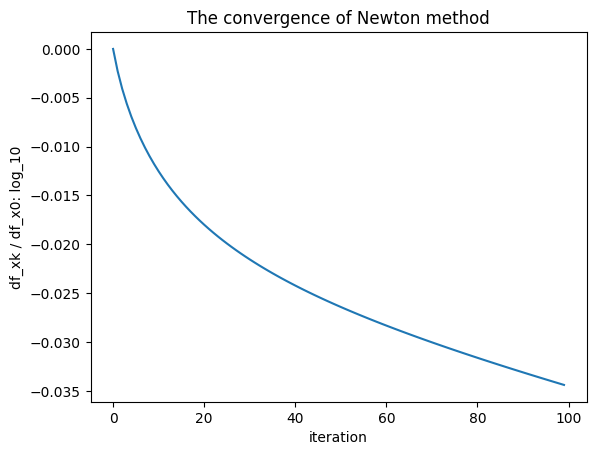

In [68]:
# setup
x_0 = set_up(seed=69)

# run the simple newton method
x_points, criterions = newton_method(function=p1_function,
                                     grad_function=p1_grad, 
                                     hessian_function=p1_H,
                                     x_0=x_0, 
                                     mode=normalized_criterion, 
                                     K=100)

criterions = [np.log10(c) for c in criterions]

plot_iterations(criterions=criterions, 
                x_label='iteration', 
                y_label=f'{normalized_criterion}: log_{10}', 
                show=False)

plt.title(f"The convergence of Newton method")
plt.show()

In [69]:
# newton + gradient descent warm-ups !! 
def newton_gd(function: callable, 
            grad_function: callable, 
            hessian_function: callable,
            x_0: np.ndarray, 
            gamma_gd: callable,
            gamma_newton: callable = None,
            gd_k=10 ** 2,
            newton_k = 10**3, 
            eps = 10**-5, 
            mode = normalized_criterion, 
            return_history: bool = True):
    
        x0_newton = gradient_descent(function=function, 
                                grad_function=grad_function,
                                x_0=x_0,
                                gamma_k=gamma_gd,
                                K=gd_k,
                                eps=eps,
                                return_history=False, 
                                mode=mode 
                                )
        
        # make sure to use the last value reached by the gradient descent algorithm
        return newton_method(function=function, 
                             grad_function=grad_function, 
                             hessian_function=hessian_function, 
                             x_0=x0_newton,
                             gamma_k=gamma_newton, 
                             K=newton_k,
                             eps=eps, 
                             return_history=return_history
                             )


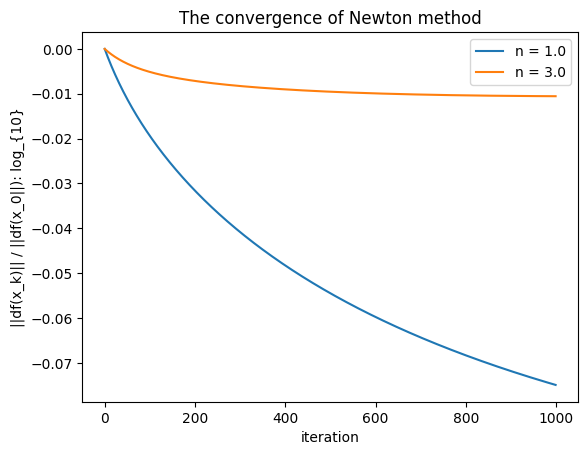

In [71]:
x_0 = set_up(seed=69)

for n in np.logspace(start=1, stop=3, num=2, base=10): 
    n = int(n)
    x_points, criterions = newton_gd(function=p1_function,
                                     grad_function=p1_grad, 
                                     hessian_function=p1_H,
                                     x_0=x_0, 
                                     gamma_gd=lambda _ : 1 / L,
                                     gd_k=n)

    criterions = [np.log10(c) for c in criterions]

    plot_iterations(criterions=criterions, 
                    plot_label=f'n = {np.log10(n)}',
                    x_label='iteration', 
                    y_label='||df(x_k)|| / ||df(x_0||): log_{10}', 
                    show=False)
    
# set the labels, title and show the plots
plt.legend()
plt.title(f"The convergence of Newton method")
plt.show()

### __b). (7 points)__ 
Implement the quasi-Newton method BFGS. 

Use it to solve the regression problem. 

Add it to the plot from the previous point about Newton method. 

Make a conclusion.

The implementation below is mainly based on the algorithm description from this [link](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)

The linear search for the step size satisfies the wolph conditions  mentioned [here](https://en.wikipedia.org/wiki/Wolfe_conditions)

In [ ]:
def descent(grad_function: callable, 
            x_k: np.ndarray, 
            p_k: np.ndarray):
    return grad_function(x_k).T @ p_k


def wolfe_conditions(function: callable, 
                     grad_function: callable,
                     x_k: np.ndarray, 
                     p_k: np.ndarray, 
                     alpha: float, 
                     c1: float, 
                     c2: float, 
                     ):
    next_x = x_k + alpha * p_k

    d = descent(grad_function=grad_function, 
                x_k=x_k, 
                p_k=p_k,)

    term1 = function(x_k) + c1 * alpha * d 
    if term1 > function(next_x):
        return False

    # time to check the 2nd condition
    return descent(grad_function=grad_function, x_k=next_x, p_k=p_k) >= c2 * d

In [ ]:
def step_size_search(function: callable, 
                     grad_function: callable,
                     x_k: np.ndarray, 
                     p_k: np.ndarray, 
                     c1: float = 10 ** -4,
                     c2: float = 0.9, 
                     search_coef: float = 0.8,
                     initial_alpha: float = 1,
                     max_iterations: int = 10) -> float:
    
    alpha = initial_alpha    
    good_alpha = False    

    for _ in range(max_iterations):
        good_alpha = wolfe_conditions(function=function, 
                                      grad_function=grad_function, 
                                      x_k=x_k,
                                      p_k=p_k,
                                      c1=c1,
                                      c2=c2, 
                                      alpha=alpha)
        if good_alpha: 
            print(f"found a sufficiently good step size: {alpha}")
            break

        alpha = search_coef * alpha
         
    return alpha    

In [ ]:
def bfgs(function: callable,
         grad_function: callable,
         x_0: np.ndarray,
         B_0: np.ndarray = None,
         eps: int = 10 ** -5,
         K: int = 10 ** 3,
         mode = normalized_criterion,
         return_history:bool=True,

         c1: float = 10 ** -4, 
         c2: float = 0.9,
         search_coef: float = 0.8, 
         initial_step_size: float = 1, 
         max_search_iterations: int = 10):
    
     # the default value for the first B matrix is the identity matrix 
     B_0 = B_0 if B_0 is not None else np.eye(max(x_0.shape))
    
     # the first step is to make sure the 'mode' variable is defined above
     if mode not in [f_diff, x_diff, normalized_criterion]:
          raise ValueError((f"the variable 'mode' is expected to belong to {[f_diff, x_diff, normalized_criterion]}"
          f"Found: {mode}"))
    
     # a boolean flag to determine whether to stop the iterative process
     criterion_stop = False

     # set the variables for the parameters 'x', 'y'
     x_current, x_previous = x_0, x_0
     B_k = B_0

     # create a list to save the intermediate points  
     x_history = [x_current]
     criterion_history = [(1 if mode==normalized_criterion else 0)]

     while not criterion_stop:
          x_grad = grad_function(x_current)
          # define p_k as - grad * B
          p_k = - B_k @ x_grad
          # find the step
          alpha_k = step_size_search(function=function,
                                   grad_function=grad_function,
                                   x_k=x_current, 
                                   p_k=p_k,
                                   c1=c1, 
                                   c2=c2,
                                   search_coef=search_coef, 
                                   initial_alpha=initial_step_size,
                                   max_iterations=max_search_iterations,
                                   )
          
          s_k = alpha_k * p_k 
          x_current = x_current + s_k
          y_k = grad_function(x_current) - grad_function(x_previous)

          sy = (s_k.T @ y_k).item()

          # time to update the inverse of the matrix B_K
          # the latter has a closed formula  
          B_k = B_k + (sy + y_k.T @ B_k @ y_k) / (sy ** 2) - (B_k @ y_k @ s_k.T + s_k @ y_k.T @ B_k) / (sy)

          if mode == f_diff:
               diff = f_difference(function(x_current), function(x_current))

          elif mode == x_difference:
               diff = x_difference(x_current, x_previous)

          else:
               diff = norm(x_current, p=2) / norm(x_0, p=2)

          criterion_history.append(diff)
          # add 'x_current' to the history
          x_history.append(x_current)
          # increment 'k' 
          k += 1

          # stop the iterative process either because the maximum number of iterations is reached 
          # or the difference is less than epsilon
          criterion_stop = diff <= eps or k >= K

     assert len(x_history) == k + 1

     # the function will all intermediate points if the 'return_history' argument is set to True
     # and only the last point otherwise    
     return x_history, criterion_history if return_history else x_history[-1]

### __c). (13 points)__ Let us again depart from regression and consider a one-dimensional minimization problem:

\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}
Solve this problem using Newton method. Draw convergence plots of the method for two different starting points $x^0 = 1.3$ and $x^0 = 1.5$. Make a conclusion.

To achieve convergence of Newton method it is not necessary to resort to using another method as a stratum method. Realize two modifications of Newton method: damped (adding a step) and cubic Newton method (see [paper](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Do these methods solve the convergence problem of Newton method for the starting point $x^0 = 1.5$? In the damped method, try taking a step from $0.5$ to $1$. Draw the convergence plots. Make a conclusion.

In [ ]:
#your solution  (Code и Markdown)

### __Problem 5. (5 points)__ 
It remains to combine the results obtained in Problems 1-4. 
For this purpose, let us remember that the original regression problem is a machine learning problem and that the linear model $g$ can be used to predict the values of labels $y$. 

How do we use the final model for prediction? 

After answering the question, make predictions on a test sample $X_{test}$. 

Compare with the actual $y_{test}$ labels. 

The number of correctly guessed labels is the accuracy/accuracy of the model. 
Compare the gradient descent method, heavy ball method, accelerated gradient method, Fletcher-Reeves method, Polak-Ribier method, Newton method, BFGS.

Construct two plots: the value of convergence criterion from running time and the prediction accuracy from running time. 

Make a conclusion.

In [ ]:
#your solution  (Code и Markdown)